# Titanic EDA

## 1. 문제 정의

타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터를 기반으로  
침몰사고 시 어떤 승객이 어떤 조건에서 어떻게 살아남은 확률을 가질 수 있는지 다양한 측면에서 분석해본다.

## 2. 라이브러리 및 데이터 로드

### 라이브러리 로드

In [1]:
# 데이터 처리
import numpy as np
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 로드 및 확인

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 컬럼별 정보

각 컬럼이 의미하는 내용은 다음과 같다.

- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home.dest : 출신


## 3. 데이터 전처리

### 각 데이터 종류 및 결측치 확인

결측치가 존재하는 항목은 `age`, `fare`, `cabin`, `embarked`, `boat`, `body`, `home.dest` 정도로 확인된다.  
여기서는 모든 컬럼을 다 활용하진 않기 때문에 일부만 처리할 예정이다.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### age

분석에 자주 사용되는 `age` 컬럼의 결측치는 버리지 말고 평균값, 최빈값 등으로 채워 넣어볼 수 있겠으나  
히스토그램의 결과에 영향을 줄 수 있으므로 이 보다는 좀 더 근거에 기반한 정보가 필요하다.

예를들어 `name` 과 같은 정보다. 다행히도 `name` 은 결측치가 없는 상태이다.

In [4]:
df[['name', 'age']].head()

,name,age
0,"Allen, Miss. Elisabeth Walton",29.00
1,"Allison, Master. Hudson Trevor",0.92
2,"Allison, Miss. Helen Loraine",2.00
3,"Allison, Mr. Hudson Joshua Creighton",30.00
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00


이들의 `name` 에는 공통되는 패턴이 보이는데, 바로 이름 중간에 Mr, Mrs, Miss, Master 등의 칭호가 기재되어 있다는 점이다.

In [5]:
df['name'].apply(lambda x: x.split(' ')[1]).unique()

array(['Miss.', 'Master.', 'Mr.', 'Mrs.', 'Col.', 'Mme.', 'Dr.', 'Major.',
       'Capt.', 'Gordon,', 'Mlle.', 'y', 'Jonkheer.', 'the', 'Don.',
       'der', 'Rev.', 'Brito,', 'Carlo,', 'Ms.', 'Khalil,',
       'Messemaeker,', 'Mulder,', 'Pelsmaeker,', 'Shawah,', 'Palmquist,',
       'Billiard,', 'Impe,', 'Melkebeke,', 'Velde,', 'Walle,', 'Steen,',
       'Cruyssen,', 'Planke,'], dtype=object)

위 같은 접근도 나쁘진 않으나 더 정확한 표현은 정규식을 통해 `XXX.` 형태의 문자열을 뽑아보는 것이다.

In [6]:
df['name'].str.extract('([A-Za-z]+)\.')[0].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [7]:
df['name2'] = df['name'].str.extract('([A-Za-z]+)\.')[0]

이들에 대해 주로 어떤 성별에 대한 호칭으로 나타나는지 살펴보면 다음과 같다.

In [8]:
pd.crosstab(df['name2'], df['sex']).T.style.background_gradient()

name2,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


각 칭호가 의미하는 바는 다음과 같다.

- Capt : Captain (군사 칭호)
- Col : Colonel (군사 칭호, 신사)
- Countess : 여백작, 백작부인
- Don : 남부유럽, 중남미에서 상대 남성의 존칭
- Dona : 남부유럽, 중남미에서 상대 여성의 존칭
- Dr : 박사, 의사
- Jonkheer : 작위
- Lady : 귀족 여성
- Major : 원사 (군사 칭호)
- Master : 주인, 석사 (?)
- Miss : 결혼하지 않은 여성
- Mlle : 마드무아젤
- Mme : 마담
- Mr : (결혼 여부와 상관없이) 남성
- Mrs : 결혼한 여성
- Ms : (결혼 여부와 상관없이) 여성
- Rev : 성직자
- Sir : 작위를 받은 남성, 윗 사람을 부르거나 상대를 존중하는 표현



분석하기에는 분류가 많으므로 이들을 축약시킬 필요가 있어 보이는데  
가장 많이 쓰이는 순인 Mr, Miss, Mrs, Master 4가지 와 나머지를 포함한 Other 로 그룹화 하면 될 것 같다.

In [9]:
df['name2'].replace(
    ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'],
    ['Mr', 'Other', 'Mrs', 'Mr', 'Mrs', 'Other', 'Other', 'Mrs', 'Mr', 'Miss', 'Mrs', 'Miss', 'Other', 'Mr'],
    inplace=True)

In [10]:
pd.crosstab(df['name2'], df['sex']).T.style.background_gradient()

name2,Master,Miss,Mr,Mrs,Other
sex,,,,,
female,0,264,0,201,1
male,61,0,762,0,20


이제 축약된 분류별로 나이의 평균을 구해볼 수 있다.

> 여기서 Master 칭호가 위에서 검색했을 때 주인, 석사에 대한 칭호로 나왔었는데  
평균나이가 5살인걸 보면 오타라기 보단 61개의 데이터인걸 보아 어린아이를 칭하는 의미도 있었던 것 같다.

In [11]:
df.groupby('name2')['age'].mean()

name2
Master     5.482642
Miss      21.824366
Mr        32.413823
Mrs       36.971264
Other     44.450000
Name: age, dtype: float64

위에서 구한 분류별 평균값을 이용하여 결측치를 채워넣으면 되겠다.

In [12]:
s = df.groupby('name2')['age'].mean()

for idx, val in s.iteritems():
  df.loc[(df['age'].isnull()) & (df['name2'] == idx), 'age'] = val

In [13]:
df['age'].isnull().sum()

0

이후 `name` 은 `name2` 로 대체가 가능하므로 더 이상 필요없는 정보라고 봐도 무방할 듯 하다.

In [14]:
df.drop('name', axis=1, inplace=True)

In [15]:
# name2 로 둘빠에 name 으로 바꿔주는게 보기 좋다.
df.rename(columns={'name2': 'name'}, inplace=True)

### 의미가 없을 것 같은 boat, body

생존률에 대해 관련이 없어보이는 `boat`, `body` 컬럼은  
향후 불필요한 데이터 로딩에 있어 성능에 영향을 줄 수 있으므로 제거한다.

In [16]:
df.drop('boat', axis=1, inplace=True)
df.drop('body', axis=1, inplace=True)

### 결측치가 많은 cabin

`cabin` 또한 결측치가 상당히 많은데 버리진 말고 존재하는 데이터만으로 활용해보기로 한다.

### 전처리 확인

처리되지 않은 나머지 결측치는 문자열 정보이므로 "Unknown" 등으로 대체해도 되나  
`isnull()` 필터 조건을 통해 유효한 값만 골라낼 수 있으므로 보류한다.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   object 
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  home.dest  745 non-null    object 
 11  name       1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


## 4. 데이터 분석

### 참고용 정보

기초 통계량

In [18]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.916028,0.498854,0.385027,33.295479
std,0.837836,0.486055,13.198878,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.824366,0.000000,0.000000,7.895800
50%,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


상관관계

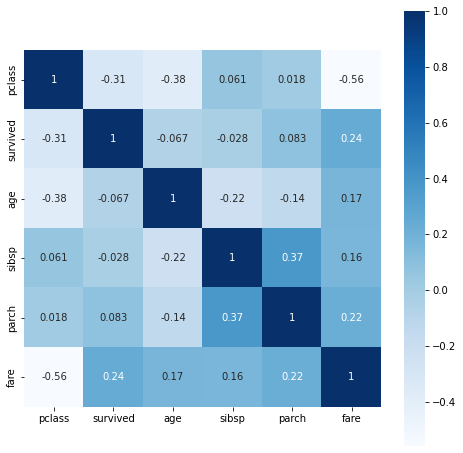

In [19]:
corr = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(data=corr, square=True, cmap="Blues", annot=True)
plt.show()

생존 유무에 따른 변수별 상관관계

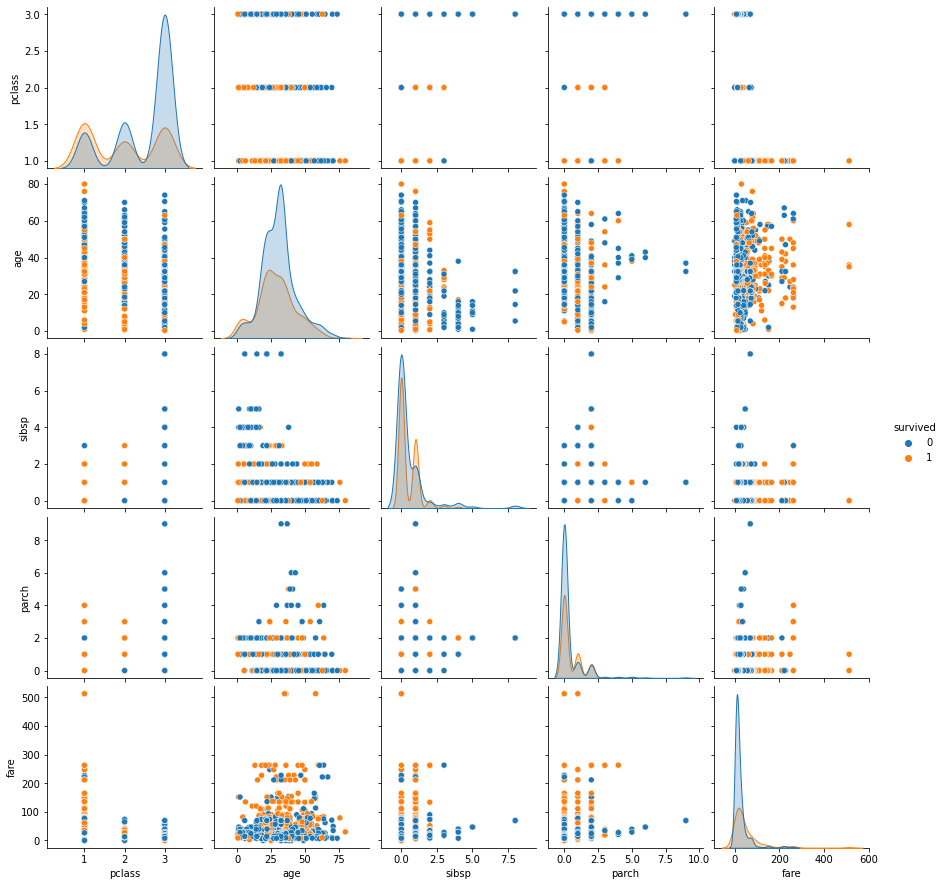

In [20]:
sns.pairplot(data=df, hue='survived')

### 전체 생존률

분석하기에 앞서 먼저 전체 생존률을 확인해본다.

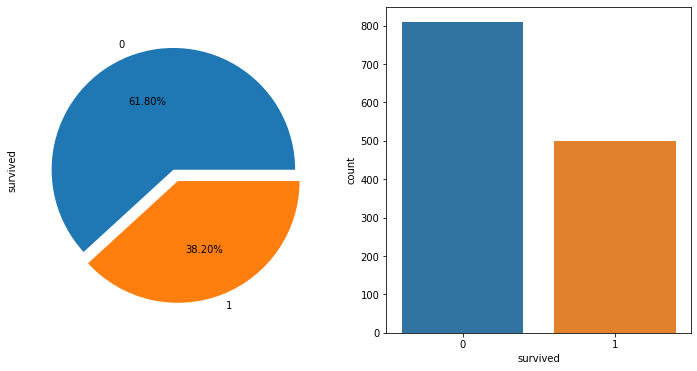

In [21]:
fig = plt.figure(figsize=(12, 6))
graph1 = fig.add_subplot(1, 2, 1)
graph2 = fig.add_subplot(1, 2, 2)

df['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=graph1)
sns.countplot(data=df, x="survived", ax=graph2)
plt.show()

`survived` 가 1인 경우 생존을 의미한다.

전체 중 38.20%, 대략 500명 정도가 생존했으며, 800명 가까이 사망한 것을 알 수 있다.

### 성별에 따른 생존률 관계

이번에는 성별과 생존률에 대해 확인해본다.

왼쪽은 각 성별의 생존률을 나타내며  
오른쪽은 각 성별의 생존 유무 분포를 나타낸다.

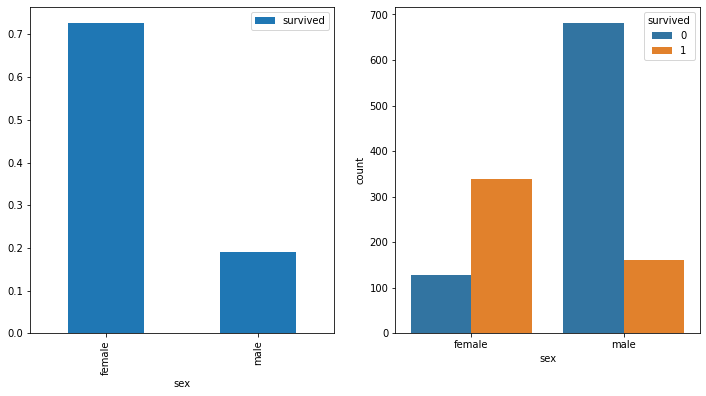

In [22]:
fig = plt.figure(figsize=(12, 6))
graph1 = fig.add_subplot(1, 2, 1)
graph2 = fig.add_subplot(1, 2, 2)

df[['sex', 'survived']].groupby('sex').mean().plot.bar(ax=graph1)
sns.countplot(data=df, x="sex", hue="survived", ax=graph2)
plt.show()

여성의 경우 70% 이상 생존한 것을 알 수 있는 반면 남성은 안타깝게도 20% 에도 미치지 못하는 듯 하다.

In [23]:
pd.pivot_table(data=df, index="sex", values="survived")

,survived
sex,
female,0.727468
male,0.190985


정확히는 여성이 72% 남성이 19% 정도로 생존했으며,  
성별은 생존률에 영향을 미친다고 할 수 있다.

침몰사고 당시 구조작업을 위해 남성들이 희생을 했었던 것일까?

### 나이에 따른 생존률 관계

이번에는 나이별로 생존률을 살펴본다.

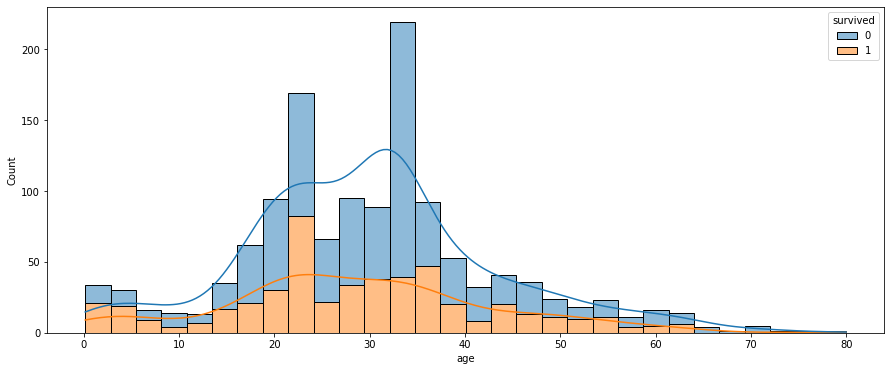

In [24]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x="age", bins=30, hue="survived", multiple="stack", kde=True)
plt.show()

주로 2 ~ 30대에서 사망자가 많은 것을 확인 할 수 있다.

그리고 결측치를 처리할 때 만들었던 분류를 사용해보면 다음과 같다.

In [25]:
pd.pivot_table(data=df, index="name", values="survived")

,survived
name,
Master,0.508197
Miss,0.678030
Mr,0.164042
Mrs,0.791045
Other,0.285714


주로 Mr, Other 인 성인 남성이 생존률이 가장 낮고  
Mrs, Miss 인 여성이 생존률이 높은편이다. (이는 성별 분류에서 확인했었음)

또한 유아들의 생존률도 높은 편인데  
이를 토대로 나이와 생존률의 관계도 있다고 할 수 있다.

좀 더 성별 및 나이대 분류를 10으로 나눠 각 생존률을 구해보면 다음과 같다.

In [26]:
t = df.copy()
t['age'] = t['age'].apply(lambda x: int(x/10))

t.groupby(['sex', 'age']).agg({'survived': [np.mean, sum]})

survived     
                mean  sum
sex    age               
female 0    0.641026   25
       1    0.734375   47
       2    0.674699  112
       3    0.752212   85
       4    0.782609   36
       5    0.925926   25
       6    0.800000    8
       7    1.000000    1
male   0    0.549020   28
       1    0.113924    9
       2    0.196507   45
       3    0.164596   53
       4    0.177778   16
       5    0.162791    7
       6    0.090909    2
       7    0.000000    0
       8    1.000000    1

60대 이상의 경우 데이터가 빈약하므로 이를 제외하면  
남성의 경우 10세 미만, 여성의 경우 50대가 가장 생존률이 높게 나왔다.

어쩌면 대체로 성인 남성들이 여성 및 유아들의 구조 작업에 뛰어들다 희생되지 않았나 예상된다...

아래는 안타깝게도 희생된 사람중 가장 연령이 낮은 케이스에 대한 결과이다.

In [27]:
df.loc[(df['survived'] == 0), 'age'].min()

0.33

### 객실 등급/지불한 운임에 따른 생존률 관계

이번에는 객실 등급에 따른 생존률을 살펴본다.

왼쪽의 경우 각 객실의 수  
오른쪽의 경우 각 객실 등급의 생존 유무 분포를 나타낸다.

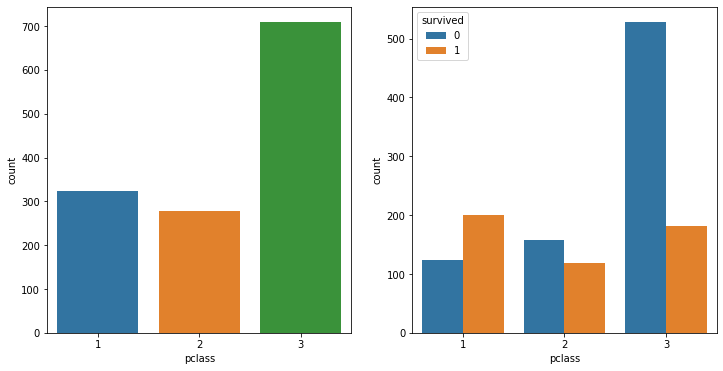

In [28]:
fig = plt.figure(figsize=(12, 6))
graph1 = fig.add_subplot(1, 2, 1)
graph2 = fig.add_subplot(1, 2, 2)

sns.countplot(data=df, x="pclass", ax=graph1)
sns.countplot(data=df, x="pclass", hue="survived", ax=graph2)
plt.show()

3등급의 객실에 머문 사람이 가장 많다.  
그리고 등급이 좋을 수록 생존률 또한 오르는 모습을 볼 수 있다.

즉, 돈이 많은 사람은 오래 살 운명이라는 뜻이다. (?)

In [29]:
pd.pivot_table(data=df, index="pclass", values="survived")

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


성별을 기준으로 객실등급과 생존률의 관계를 나타내보면 1등급 객실에 머문 여성의 생존률이 매우 높음을 알 수 있다.  
그리고 의외로 3등급보다 2등급 객실에 머문 남성이 생존률이 조금 더 낮았다.

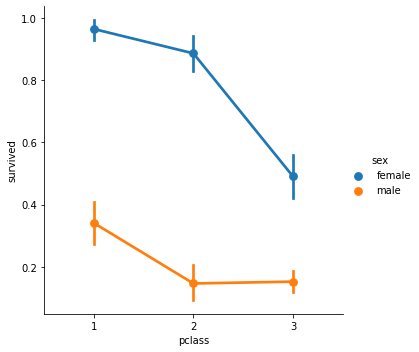

In [30]:
sns.catplot(data=df, x='pclass', y='survived', hue='sex', kind='point')
plt.show()

아래는 성별 및 연령대 별을 기준으로 객실 등급 분포를 본 것인데,  
주로 연령이 높은 층이 좋은 객실에 머물렀다는 것을 알 수 있다.

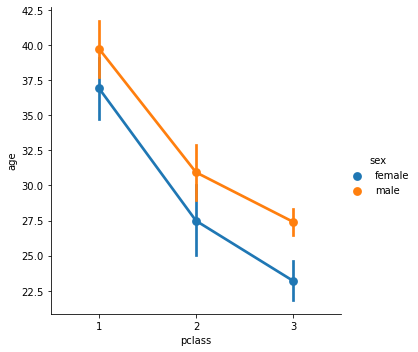

In [31]:
sns.catplot(data=df, x='pclass', y='age', hue='sex', kind='point')
plt.show()

이번에는 객실별 나이에 대한 생존자 비율의 관계를 살펴보면 다음과 같다.

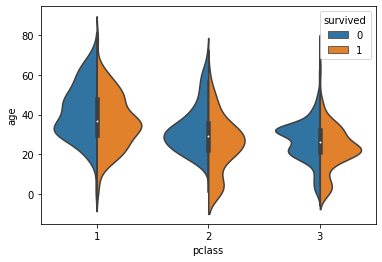

In [32]:
sns.violinplot(data=df, x='pclass', y='age', hue='survived', split=True)
plt.show()

참고로 지불한 운임에 대한 정보를 따로 분석할 필요는 없을 것 같다.  
좋은 객실일수록 요금 또한 높아질 것은 당연한 사실이기 때문이다.

In [33]:
pd.pivot_table(data=df, index="pclass", values="fare")

,fare
pclass,
1,87.508992
2,21.179196
3,13.302889


### 가족 구성에 따른 생존률 관계

먼저 부모 혹은 자녀의 수부터 살펴보면 다음과 같다.

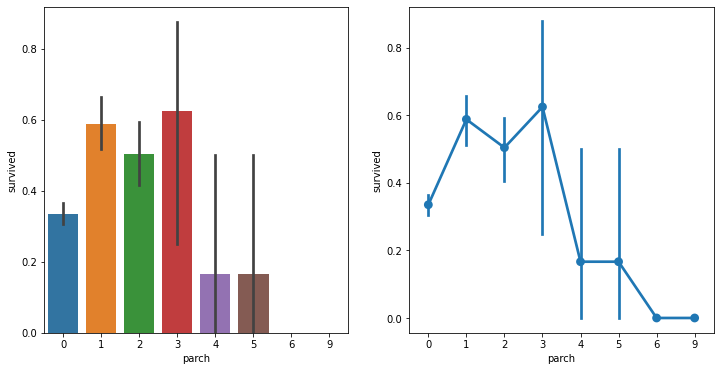

In [34]:
fig = plt.figure(figsize=(12, 6))
graph1 = fig.add_subplot(1, 2, 1)
graph2 = fig.add_subplot(1, 2, 2)

# 아래는 0, 1, 2 의 항목이 비중이 높아 나머지의 분포 확인이 어렵다.
# sns.histplot(data=df, x="parch", ax=graph1)
# sns.histplot(data=df, x="parch", hue="survived", ax=graph2, multiple="stack")

sns.barplot(data=df, x="parch", y="survived", ax=graph1)
sns.pointplot(data=df, x="parch", y="survived", ax=graph2)
plt.show()

In [35]:
pd.pivot_table(data=df, index="parch", values="survived")

,survived
parch,
0,0.335329
1,0.588235
2,0.504425
3,0.625000
4,0.166667
5,0.166667
6,0.000000
9,0.000000


구성원이 1 ~ 3명인 경우에 높은 생존률을 보이고 있다.  
(가장 높은 수치는 3명인 경우)

다음으로 형제 혹은 부부의 수를 기준으로 보면 아래와 같다.

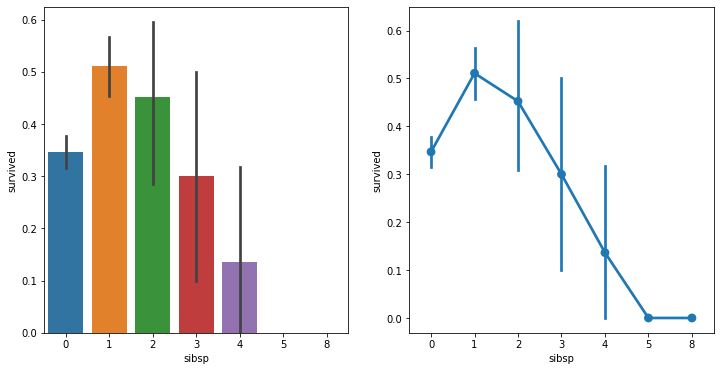

In [36]:
fig = plt.figure(figsize=(12, 6))
graph1 = fig.add_subplot(1, 2, 1)
graph2 = fig.add_subplot(1, 2, 2)

sns.barplot(data=df, x="sibsp", y="survived", ax=graph1)
sns.pointplot(data=df, x="sibsp", y="survived", ax=graph2)
plt.show()

In [37]:
pd.pivot_table(data=df, index="sibsp", values="survived")

,survived
sibsp,
0,0.346801
1,0.510972
2,0.452381
3,0.300000
4,0.136364
5,0.000000
8,0.000000


이전과 비슷한데  
구성원이 1 ~ 2 명인 경우에 높은 생존률을 보이고 있다.  
(가장 높은 수치는 1명인 경우)

내심 가족 구성원이 많으면 생존본능이 발동될 것만 같았지만 의외로 그렇지 않은 듯 하다.

### 출신별에 따라서도 생존률과 관계가 있을까?

해당 `home.dest` 데이터는 위의 데이터 전처리 과정에서 생략되었기 때문에 결측값이 존재한다.

그런데 그 결측값이 어찌 많은 것 같다...

In [38]:
df['home.dest'].isnull().sum()

564

우선 결측값을 제외한 데이터만으로 분석한다.

In [39]:
t = df[df['home.dest'].notnull()]

In [40]:
t['home.dest'].nunique()

369

In [41]:
t['home.dest'].value_counts()

New York, NY                                    64
London                                          14
Montreal, PQ                                    10
Paris, France                                    9
Cornwall / Akron, OH                             9
                                                ..
Chelsea, London                                  1
Harrow-on-the-Hill, Middlesex                    1
Copenhagen, Denmark                              1
Guernsey / Montclair, NJ and/or Toledo, Ohio     1
Antwerp, Belgium / Stanton, OH                   1
Name: home.dest, Length: 369, dtype: int64

좀 더 그룹을 간소화 시킬 필요가 있는데, 이를 처리하려면 적어도 대륙별로 나눈다던지의 작업이 필요해 보인다.

그러기 위해서는 geodata 를 활용한 별도의 데이터 전처리를 해야 하므로 시간 관계상 생략한다.

### 탑승위치에 따라서도 생존률과 관계가 있을까?

해당 `embarked` 데이터 또한 위의 데이터 전처리 과정에서 생략되었기 때문에 결측값이 존재한다.

In [42]:
df['embarked'].isnull().sum()

2

하지만 결측값은 극히 일부이므로 이를 제외하고 진행해도 상관없을 것 같다.

In [43]:
t = df[df['embarked'].notnull()]

탑승위치(선착장)는 총 3가지가 있다.

In [44]:
t['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

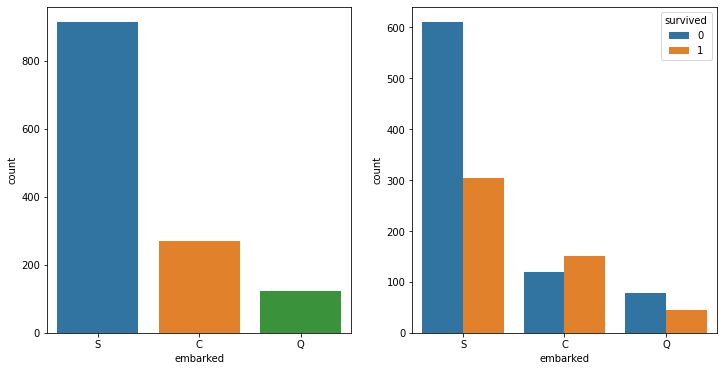

In [45]:
fig = plt.figure(figsize=(12, 6))
graph1 = fig.add_subplot(1, 2, 1)
graph2 = fig.add_subplot(1, 2, 2)

sns.countplot(data=t, x="embarked", ax=graph1)
sns.countplot(data=t, x="embarked", hue="survived", ax=graph2)
plt.show()

S 에서 탄 승객수가 가장 많으며 그만큼 사망자 수 또한 가장 높은 수치를 보이고 있다.

만약 결측치를 채워넣게 된다면 S 에서 승선한 것으로 채워넣어도 될 듯 하다.

In [46]:
pd.pivot_table(data=df, index="embarked", values="survived")

,survived
embarked,
C,0.555556
Q,0.357724
S,0.332604


의외로 C 에서 탄 승객의 생존률이 높게 나오고 있다.

## 5. 결론



가장 높은 생존률이 되기 위한 조건은 다음과 같다.

1. 여성
2. 여성이라면 50대, 남성이라면 10세 미만의 유아
3. 1등급 객실
4. 가족구성이 1명
5. C 선착장에서 탑승